In [1]:
from sklearn.datasets import make_moons, make_blobs, make_classification
import seaborn as sns
import matplotlib.pyplot as plt
import hdbscan
from fcmeans import FCM

In [16]:
X,y = make_blobs( n_samples = 25 , n_features=2, centers=3 , center_box = (0 , 1) , cluster_std=0.155)

D:\anaconda3\envs\nlp38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

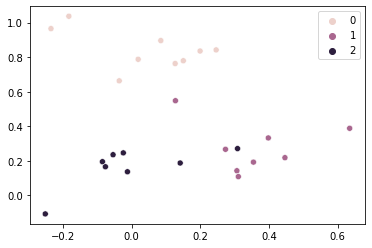

In [17]:
sns.scatterplot(X[:,0],X[:,1] , hue = y)

## FCM

In [22]:
fcm = FCM(n_clusters=3 , m = 1.1)
fcm.fit(X)

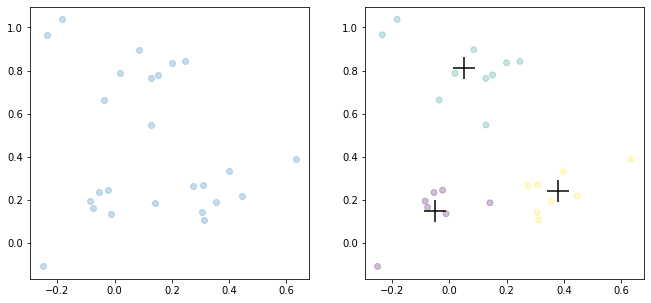

In [23]:
# outputs
fcm_centers = fcm.centers
fcm_labels = fcm.predict(X)

# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(X[:,0], X[:,1], alpha=.25)
axes[1].scatter(X[:,0], X[:,1], c=fcm_labels, alpha=.25)
axes[1].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='black')
#plt.savefig('images/basic-clustering-output.jpg')
plt.show()

# HDBSCAN

In [44]:
clusterer = hdbscan.HDBSCAN(min_samples=4,min_cluster_size=4, cluster_selection_epsilon=0.5,max_cluster_size=7,prediction_data=True).fit(X)
color_palette = sns.color_palette('Paired', 6)
projection = X

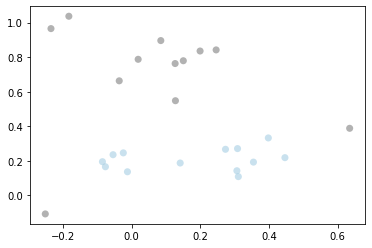

In [45]:
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.6)
#plt.scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='black')

# DBSCAN

In [46]:
import sklearn.cluster as cluster
import time
import numpy as np
%matplotlib inline
sns.set_color_codes()


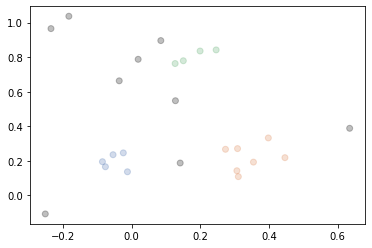

In [49]:
labels = cluster.DBSCAN(eps = 0.11, min_samples = 4).fit_predict(X)
palette = sns.color_palette('deep', np.unique(labels).max() + 1)
colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
plt.scatter(X.T[0], X.T[1], c=colors, alpha =  0.25)
frame = plt.gca()